# Proyecto 1, Modelos de Gestión Financiera
## Sebastian Puerto
## 25 de septiembre de 2019

In [85]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
def grafico_valor_activo(S0 = 100, m0 = 0.01, sig = 0.05, dt = 1, Dt = 1, N = 10):
    tf = N*Dt+1
    ts = np.array(range(0,tf))
    dws = np.array([np.random.normal(0, dt) for i in range(tf)])
    
    Ss = np.zeros(tf)
    Ss[0] = S0
    
    for t in range(1, tf):
        S = Ss[t-1]
        dS = S*(m0*dt + sig*dws[t-1]) #dt = 1
        Ss[t] = S + dS 
        
    #figura = plt.figure()
    #ejes = figura.add_axes()
    plotTs = np.array(range(0, tf, Dt))
    plotSs = np.zeros(len(plotTs))
    
    for i in range(len(plotTs)):
        plotSs[i] = Ss[plotTs[i]]
    
    plt.plot(plotTs, plotSs)
    
    plt.show()
    
    return ts, Ss

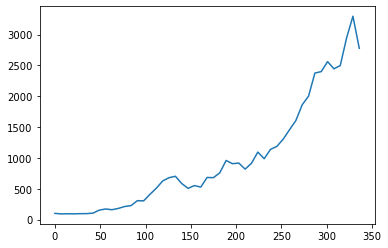

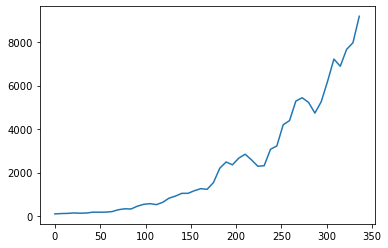

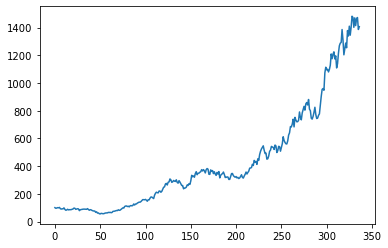

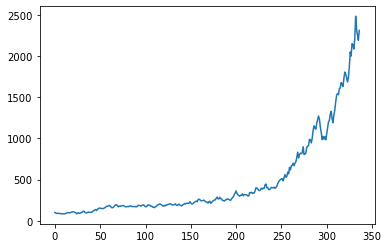

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [131]:
grafico_valor_activo(Dt = 7, N = 4*12)
grafico_valor_activo(Dt = 7, N = 4*12)
grafico_valor_activo(Dt = 1, N = 4*7*12)
grafico_valor_activo(Dt = 1, N = 4*7*12)